In [8]:
import os, warnings
import matplotlib.pyplot as plt
from matplotlib import gridspec
import pandas as pd
import numpy as np

df_train_labels = pd.read_csv('train.csv')

df_train_labels

,img_path,label,type
0,train_data/1.png,3,1
1,train_data/2.png,7,3
2,train_data/3.png,9,2
3,train_data/4.png,9,1
4,train_data/5.png,10,1
...,...,...,...
2995,train_data/2996.png,10,1
2996,train_data/2997.png,2,1
2997,train_data/2998.png,7,1
2998,train_data/2999.png,7,3


In [ ]:
!!!!!!!!!!!################!!!!!!!!!!!!!!!!!!!!!!!!!

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import cvlib as cv
from cvlib.object_detection import draw_bbox
from numpy.lib.polynomial import poly


def show_image(img):
    plt.figure(figsize=(7,7) )
    plt.axis('off')
    plt.imshow(img)
    plt.show()

In [10]:
def fill_single_contour(image):
    image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
    
    #kernel = np.ones((3, 3), 'uint8')
    #image_hsv = cv2.erode(image_hsv, kernel, iterations=1)
    
    #Finding edges of the image
    edge_image = cv2.Canny(image_hsv,200,250)
        
    contours, _ = cv2.findContours(edge_image, 
        cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    #image = np.zeros((320,320,3), np.uint8) 
    #image.fill(255)
    image.fill(255);

    
    cv2.fillPoly(image, contours, color=(0,0,0))
    

In [11]:
def find_squares(image):
    
    squares = 0
    # converting image into grayscale image
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # setting threshold of gray image
    _, threshold = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

    # using a findContours() function
    contours, _ = cv2.findContours(threshold, 
                                   cv2.RETR_TREE,
                                   #cv2.RETR_EXTERNAL,
                                   cv2.CHAIN_APPROX_SIMPLE)
  
    i = 0
    
    if len(contours) > 10:
        return 0
    
    # list for storing names of shapes
    for contour in contours:
  
        # here we are ignoring first counter because 
        # findcontour function detects whole image as shape
        if i == 0:
            i = 1
            continue
  
        # cv2.approxPloyDP() function to approximate the shape
        approx = cv2.approxPolyDP(
            contour, 0.03 * cv2.arcLength(contour, True), True)
      
        # using drawContours() function
        #cv2.drawContours(contour_range_0, [contour], 0, (0, 0, 255), 3)
        
        (x, y, w, h) = cv2.boundingRect(approx)
            #Check if bounder sqare x,y is close to approx x,y
        
        if( (approx[0][0][0] - x)**2 + (approx[0][0][1] - y)**2 < 16 ):
        
            #if(len(approx) > 3 and len(approx) < 20):
                #print('x', x, 'y', y, approx[0][0][0], np.shape(approx))
            ar = w / float(h)
                # a square will have an aspect ratio that is approximately
                # equal to one, otherwise, the shape is a rectangle
                #shape = "square" if ar >= 0.95 and ar <= 1.05 else "rectangle"
            if ar >= 0.95 and ar <= 1.05:
                squares += 1
            
    
    return squares
            

In [12]:
def sqares_in_img(img):
    #img = cv2.imread('/home/ytm/Projects/nnsquares/train_data/train_data/12.png')

    img_hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)

    squares = 0

    contour_range = []
    j = 0
    for i in range(181):
        MIN = np.array([i, 10, 10],np.uint8)
        MAX = np.array([i, 255, 255],np.uint8)

        img_thresh = cv2.inRange(img_hsv, MIN, MAX) # modify your thresholds

        #Finding edges of the image
        #low_threshold = 100
        #kernel_size = 3
        #ratio = 3
    
        #img_blur = cv2.blur(img_thresh, (3,3))
        #edge_image = cv2.Canny(img_blur, low_threshold, low_threshold*ratio, kernel_size)
    
    
        #edge_image = cv2.Canny(img_thresh,250,250)

        contours, hierarchy = cv2.findContours(img_thresh, 
            cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
        if(contours):
        #Creating blank image
            contour_range.append( np.zeros((320,320,3), np.uint8) )
            contour_range[j].fill(255)
        
            for contour in contours:

                cv2.drawContours(contour_range[j], [contour], -1, (0, 255 , 0) , 2)
            
            kernel = np.ones((3, 3), 'uint8')
            contour_range[j] = cv2.erode(contour_range[j], kernel, iterations=2)

            
            fill_single_contour(contour_range[j])
            
            kernel = np.ones((3, 3), 'uint8')
        
            contour_range[j] = cv2.dilate(contour_range[j], kernel, iterations=3)

            contour_range[j] = cv2.erode(contour_range[j], kernel, iterations=3)
            
            sq = find_squares(contour_range[j])
            #f sq:
            #    show_image(contour_range[j])
            #    print('!', sq)
            squares += sq
            j += 1
    
    return squares

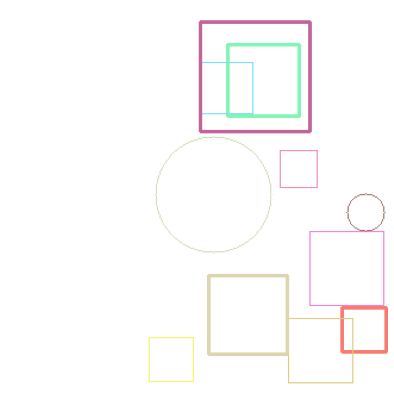

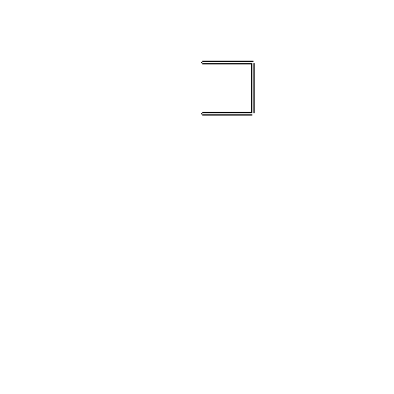

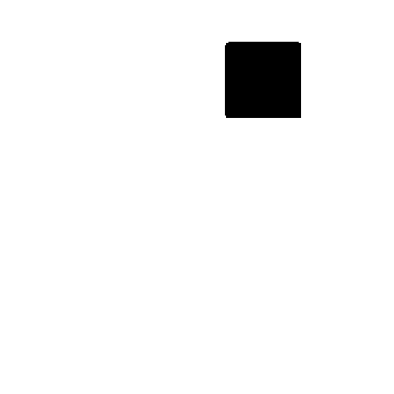

! 1


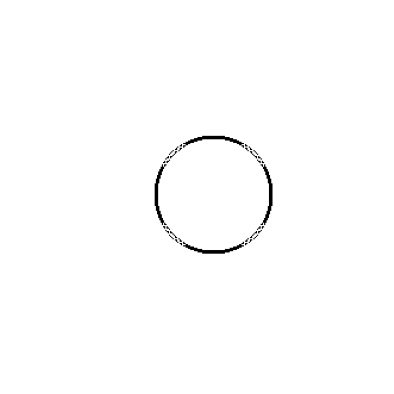

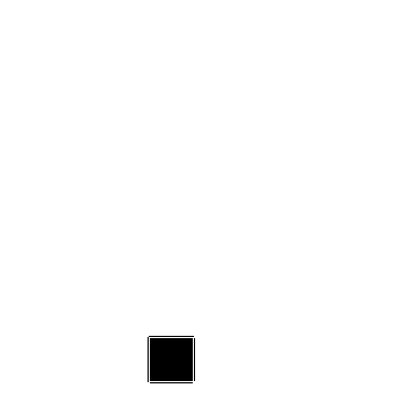

! 1


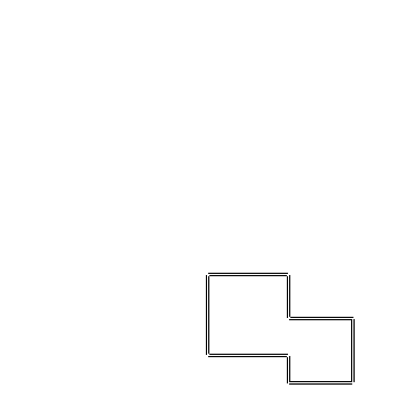

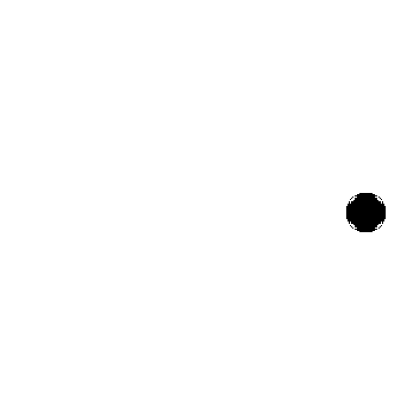

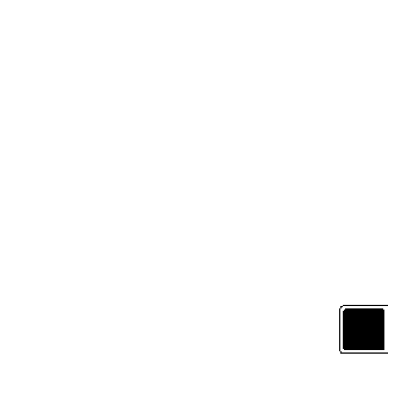

! 1


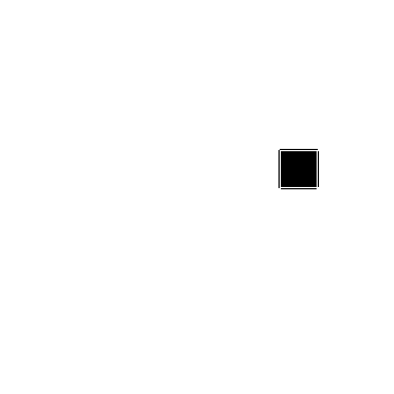

! 1


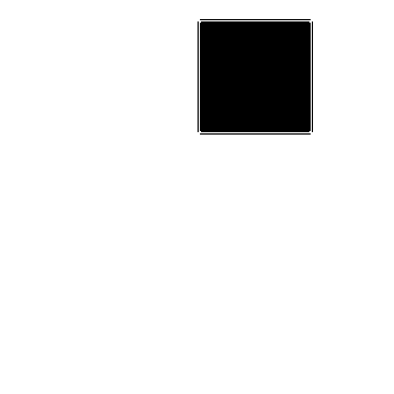

! 1


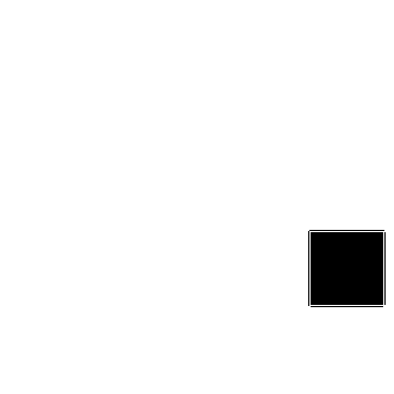

! 1
6


In [6]:
# sqares_in_img function for testing
img = cv2.imread('/home/ytm/Projects/nnsquares/train_data/train_data/501.png')

show_image(img)

img_hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)


squares = 0

contour_range = []
j = 0
for i in range(181):
    MIN = np.array([i, 10, 10],np.uint8)
    MAX = np.array([i, 255, 255],np.uint8)

    img_thresh = cv2.inRange(img_hsv, MIN, MAX) # modify your thresholds

    #Finding edges of the image
    #low_threshold = 100
    #kernel_size = 3
    #ratio = 3
    
    #img_blur = cv2.blur(img_thresh, (3,3))
    #edge_image = cv2.Canny(img_blur, low_threshold, low_threshold*ratio, kernel_size)
    
    
    #edge_image = cv2.Canny(img_thresh,250,250)

    contours, hierarchy = cv2.findContours(img_thresh, 
        cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    if(contours):
    #Creating blank image
        contour_range.append( np.zeros((320,320,3), np.uint8) )
        contour_range[j].fill(255)
        
        for contour in contours:
            contour_range[j] = cv2.polylines(contour_range[j], [contour],
                      True, (0, 0 , 0), 1)
            #cv2.drawContours(contour_range[j], [contour], -1, (0, 255 , 0) , 2)
        kernel = np.ones((3, 3), 'uint8')
        

        contour_range[j] = cv2.erode(contour_range[j], kernel, iterations=1)
        contour_range[j] = cv2.dilate(contour_range[j], kernel, iterations=1)
        
        
        
        fill_single_contour(contour_range[j])
        
        show_image(contour_range[j])
            

        kernel = np.ones((3, 3), 'uint8')
        
        contour_range[j] = cv2.dilate(contour_range[j], kernel, iterations=3)

        contour_range[j] = cv2.erode(contour_range[j], kernel, iterations=3)
        
        
        
        sq = find_squares(contour_range[j])
        if sq:
            #show_image(contour_range[j])
            print('!', sq)
        squares += sq
        j += 1
    
print(squares)

In [13]:
df_train_a = df_train_labels.loc[df_train_labels['type'] == 1]
df_train_b = df_train_labels.loc[df_train_labels['type'] == 2]
df_train_c = df_train_labels.loc[df_train_labels['type'] == 3]

In [17]:
y_pred = []
k = 0
for i, row in df_train_a.iterrows():
    path = '/home/ytm/Projects/nnsquares/train_data/train_data/'
    path += str(i+1)
    path += '.png'
    img = cv2.imread(path)
    
    y_pred.append(sqares_in_img(img))
    
    
    if(k % 10 == 0):
        print(i, end=' ')
    k+=1


0 55 85 110 139 169 204 225 256 284 314 334 371 391 421 452 476 521 541 565 611 630 662 689 711 743 765 790 807 838 865 893 922 954 970 996 1017 1053 1077 1120 1160 1187 1211 1236 1262 1283 1312 1347 1372 1417 1442 1467 1504 1539 1577 1608 1631 1669 1711 1747 1774 1798 1825 1856 1877 1912 1948 1976 1998 2018 2037 2068 2094 2133 2169 2213 2241 2287 2305 2342 2368 2407 2434 2451 2473 2510 2535 2577 2601 2645 2680 2703 2736 2777 2812 2847 2872 2919 2950 2974 

In [18]:
y_pred_a = y_pred
#y_pred_b = y_pred
#y_pred_c = y_pred

In [19]:
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(df_train_a['label'], y_pred_a, squared=False)
print(rms)
#df_train_a['error'] = abs(df_train_labels['label'] - df_train_labels['pred'])
#df_train_a

0.4919349550499537


In [19]:
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(df_train_b['label'], y_pred_b, squared=False)
print(rms)

0.7483314773547883


In [22]:
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(df_train_b['label'], y_pred_c, squared=False)
print(rms)

4.0204477362602296


In [143]:
y_pred = []
y_pred = y_pred + y_pred_a + y_pred_b + y_pred_c
mean_squared_error(df_train_labels['label'], y_pred, squared=False)

4.007576158561015

In [21]:
df_test_labels = pd.read_csv('test.csv')
df_test_labels

,img_path
0,test_data/1.png
1,test_data/2.png
2,test_data/3.png
3,test_data/4.png
4,test_data/5.png
...,...
5995,test_data/5996.png
5996,test_data/5997.png
5997,test_data/5998.png
5998,test_data/5999.png


In [22]:
y_pred = []
for i, row in df_test_labels.iterrows():
    path = '/home/ytm/Projects/nnsquares/test_data/test_data/'
    path += str(i+1)
    path += '.png'
    img = cv2.imread(path)
    
    y_pred.append(sqares_in_img(img))
    
    
    if(i % 10 == 0):
        print(i, end=' ')

0 10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 260 270 280 290 300 310 320 330 340 350 360 370 380 390 400 410 420 430 440 450 460 470 480 490 500 510 520 530 540 550 560 570 580 590 600 610 620 630 640 650 660 670 680 690 700 710 720 730 740 750 760 770 780 790 800 810 820 830 840 850 860 870 880 890 900 910 920 930 940 950 960 970 980 990 1000 1010 1020 1030 1040 1050 1060 1070 1080 1090 1100 1110 1120 1130 1140 1150 1160 1170 1180 1190 1200 1210 1220 1230 1240 1250 1260 1270 1280 1290 1300 1310 1320 1330 1340 1350 1360 1370 1380 1390 1400 1410 1420 1430 1440 1450 1460 1470 1480 1490 1500 1510 1520 1530 1540 1550 1560 1570 1580 1590 1600 1610 1620 1630 1640 1650 1660 1670 1680 1690 1700 1710 1720 1730 1740 1750 1760 1770 1780 1790 1800 1810 1820 1830 1840 1850 1860 1870 1880 1890 1900 1910 1920 1930 1940 1950 1960 1970 1980 1990 2000 2010 2020 2030 2040 2050 2060 2070 2080 2090 2100 2110 2120 2130 2140 2150 2160 2170 2180 2190 2200 2210 2

In [23]:
df_test_labels['pred'] = y_pred
np.savetxt('pred.csv',y_pred, fmt='%d',header='label')

In [ ]:
##################!!!!!!!!!!!!!!!!!################

In [138]:
from sklearn.metrics import mean_squared_error


df_train_labels['pred'] = y_pred

rms = mean_squared_error(df_train_labels['label'], df_train_labels['pred'], squared=False)
print(rms)
df_train_labels['error'] = abs(df_train_labels['label'] - df_train_labels['pred'])
#df_errors = df_train_labels.loc[df_train_labels['pred'] > df_train_labels['label']]
df_errors = df_train_labels.loc[df_train_labels['pred'] - df_train_labels['label'] == 1]
df_errors[0:40].loc[df_train_labels['label'] == 1]

0.7930952023559341


,img_path,label,type,pred,error
233,train_data/234.png,1,3,2,1
434,train_data/435.png,1,2,2,1
504,train_data/505.png,1,3,2,1
597,train_data/598.png,1,3,2,1
725,train_data/726.png,1,2,2,1


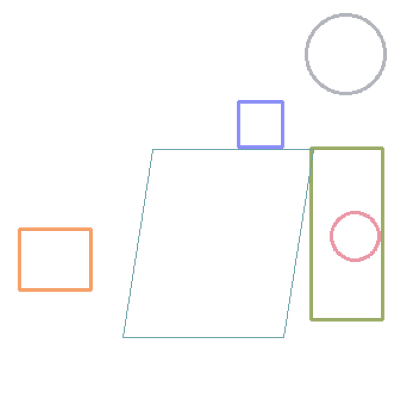

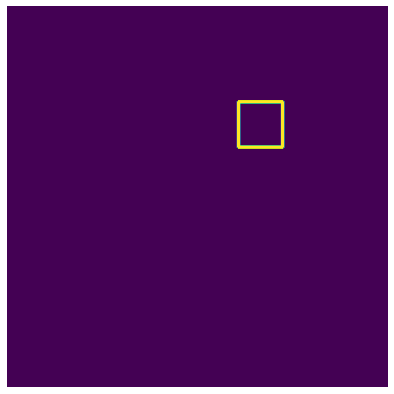

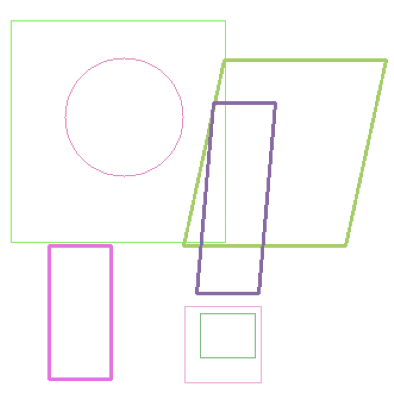

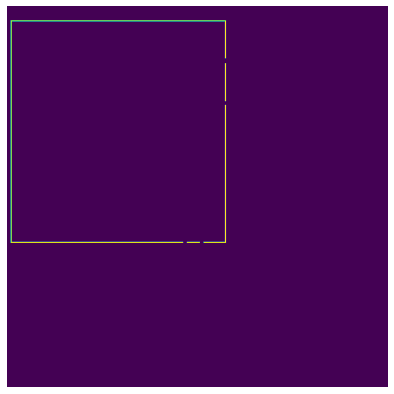

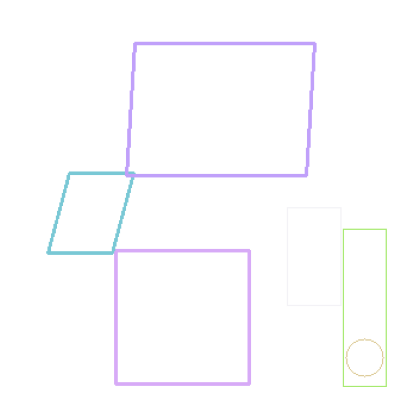

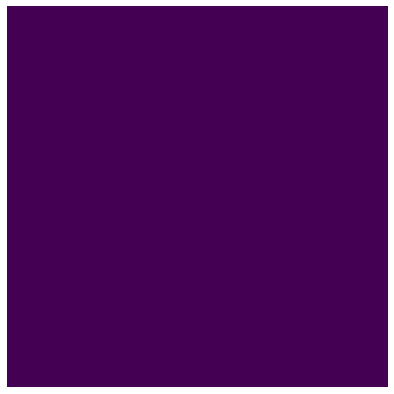

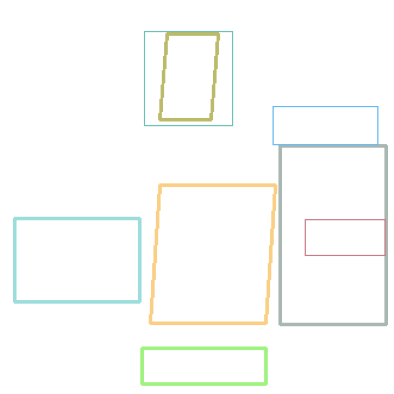

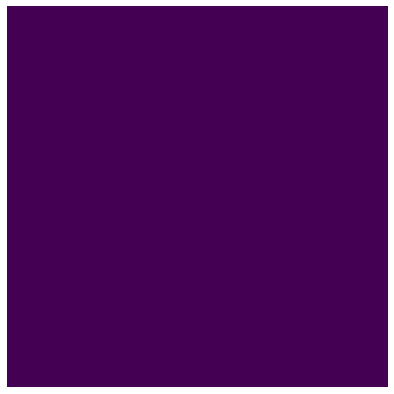

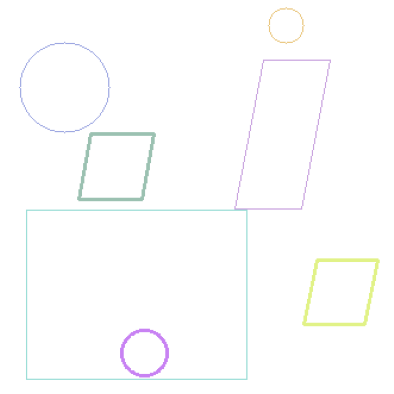

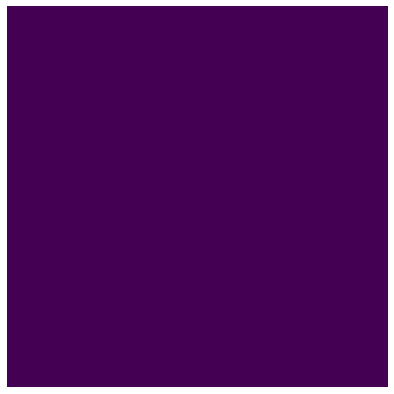

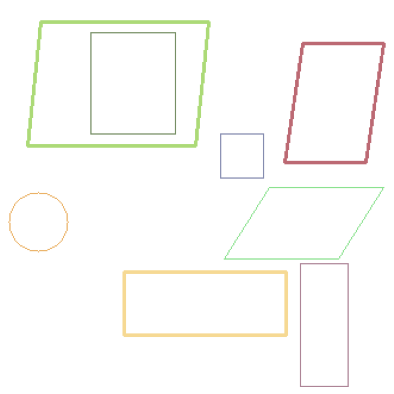

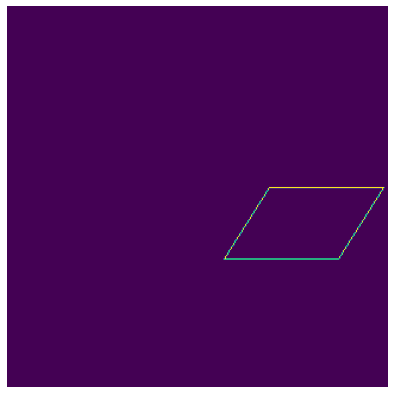

In [140]:
err_list = [30,234,435,557,503,44]
path = ''
for img in err_list:
    path = '/home/ytm/Projects/nnsquares/train_data/train_data/'
    path += str(img)
    path += '.png'
    
    MIN = np.array([137, 10, 10],np.uint8)
    MAX = np.array([147, 255, 255],np.uint8)

    img_thresh = cv2.inRange(cv2.imread(path), MIN, MAX)
    
    show_image(cv2.imread(path))
    show_image(img_thresh)